# **1 Μέρος 1 (5 μονάδες): Εκτίμηση μέσης τιμής ακινήτου από χαρακτηριστικά απογραφής (δεδομένα πίνακα)**

# **1.1 ∆ιερεύνηση των δεδομένων (EDA) και προ-επεξεργασία**

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree


Φορτώστε τα δεδομένα χρησιμοποιώντας τη συνάρτηση read_csv του pandas.

In [2]:
# Read and assign data to "data"
data = pd.read_csv('/content/drive/MyDrive/Διαχείριση Δεδομένων ΙΙ (ΕΦΠ07)/Machine_Learning/housing.csv')

• Αξιοποιήστε τις συναρτήσεις head() , info() και describe() του Pandas για να δείτε δείγματα των δεδομένων, καθώς και για να εξάγετε περιγραφικά στατιστικά του συνόλου δεδομένων

In [3]:
# Look the first 10 elements of our table data using the .head()
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
# See the data info using the .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Data statistical using .describe()
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Παράξτε το ιστόγραμμα κάθε χαρακτηριστικού (στήλης), χρησιμοποιώντας τη βιβλιοθήκη matplotlib
και συγκεκριμένα τη συνάρτηση pyplot.hist . Έχοντας φορτώσει το σύνολο δεδομένων σας,
μπορείτε να παράξετε τα ιστογράμματα ως εξης:
df_name.hist(bins=50,figsize=(20,15))
plt.show()
όπου “df_name” το όνομα της μεταβλητής στην οποία έχετε φορτώσει το σύνολο δεδομένων

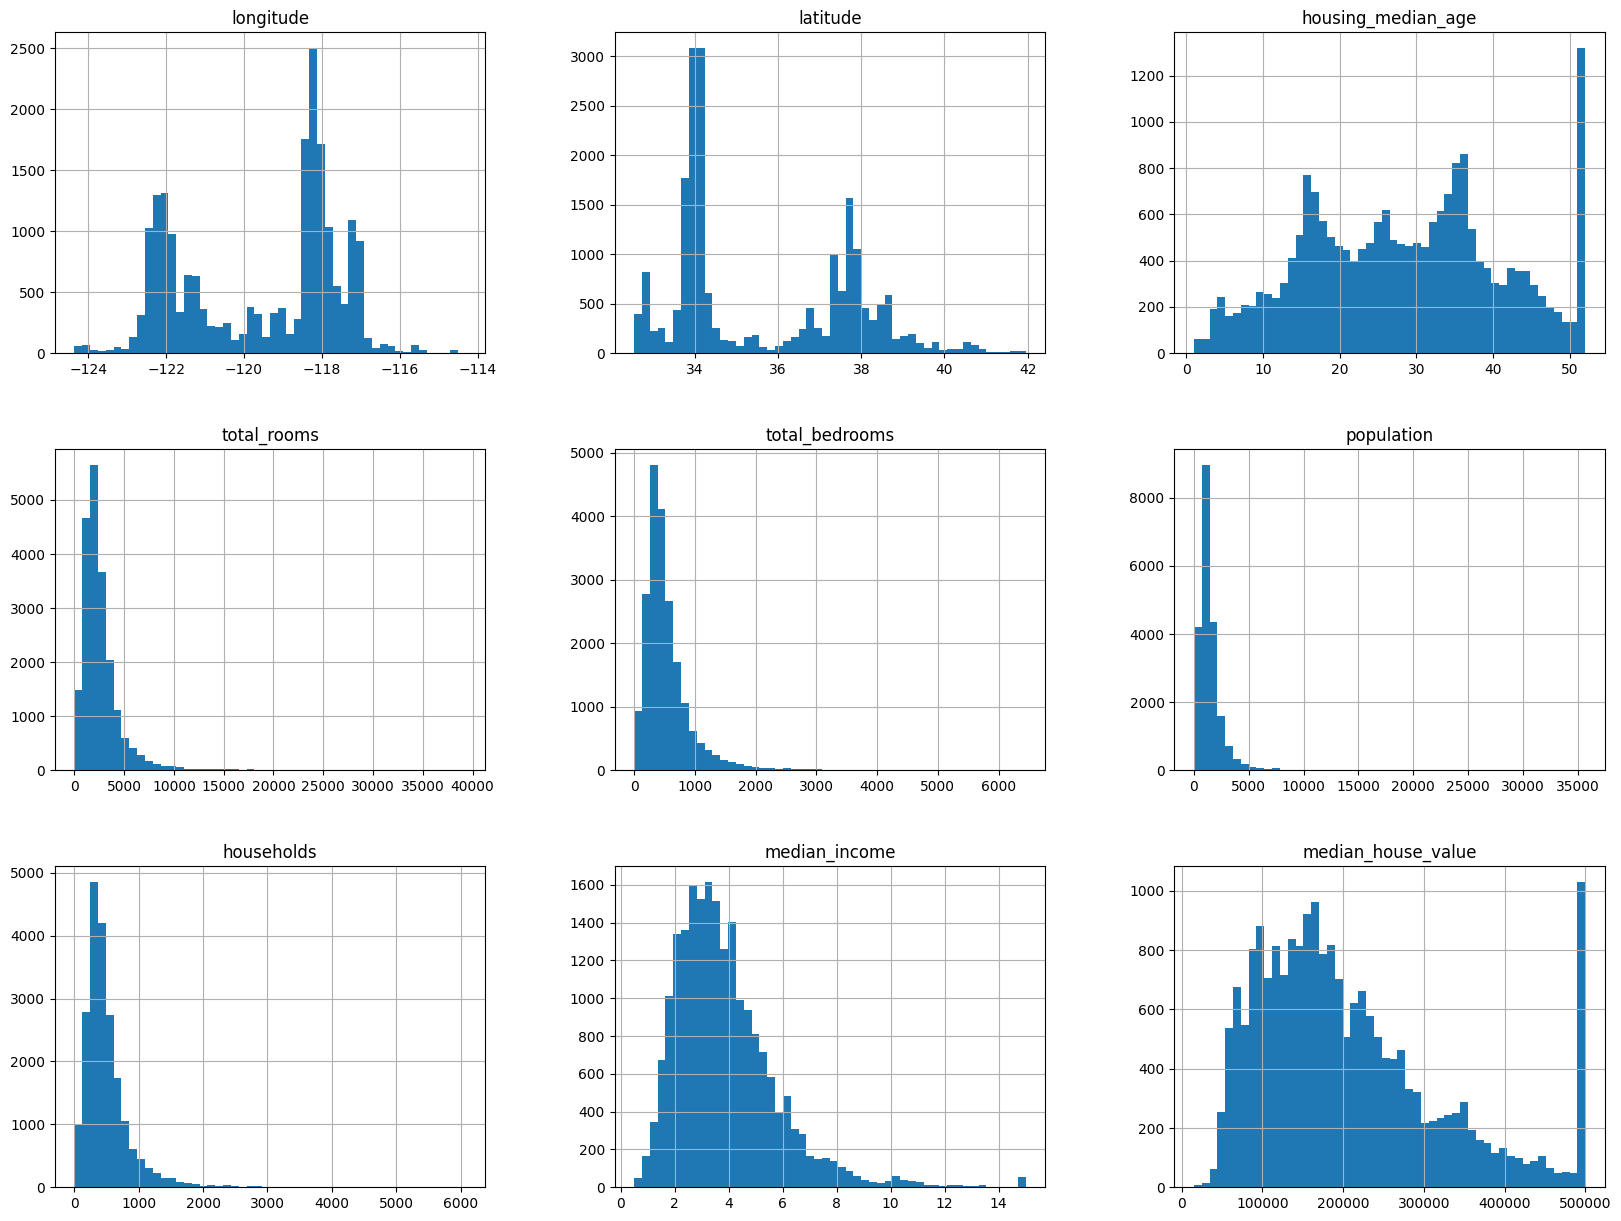

In [6]:
# Create plot per data category
data.hist(bins=50,figsize=(20,15))
plt.show()


∆ιαπιστώστε εάν υπάρχουν ελλιπείς εγγραφές (missing values) στα δεδομένα μας. Μπορείτε να το
διαπιστώσετε ως εξής:
df_name.isnull().sum() όπου “df_name” το όνομα της μεταβλητής στην οποία έχετε φορτώσει το σύνολο δεδομένων. Επίσης μπορούμε εύκολα να οπτικοποιήσουμε το αποτέλεσμα μέσω της
βιβλιοθήκης missingno (προαιρετικό για τη συγκεκριμένη εργασία αλλά θα προσμετρηθεί θετικά).

In [7]:
# Find the null data
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

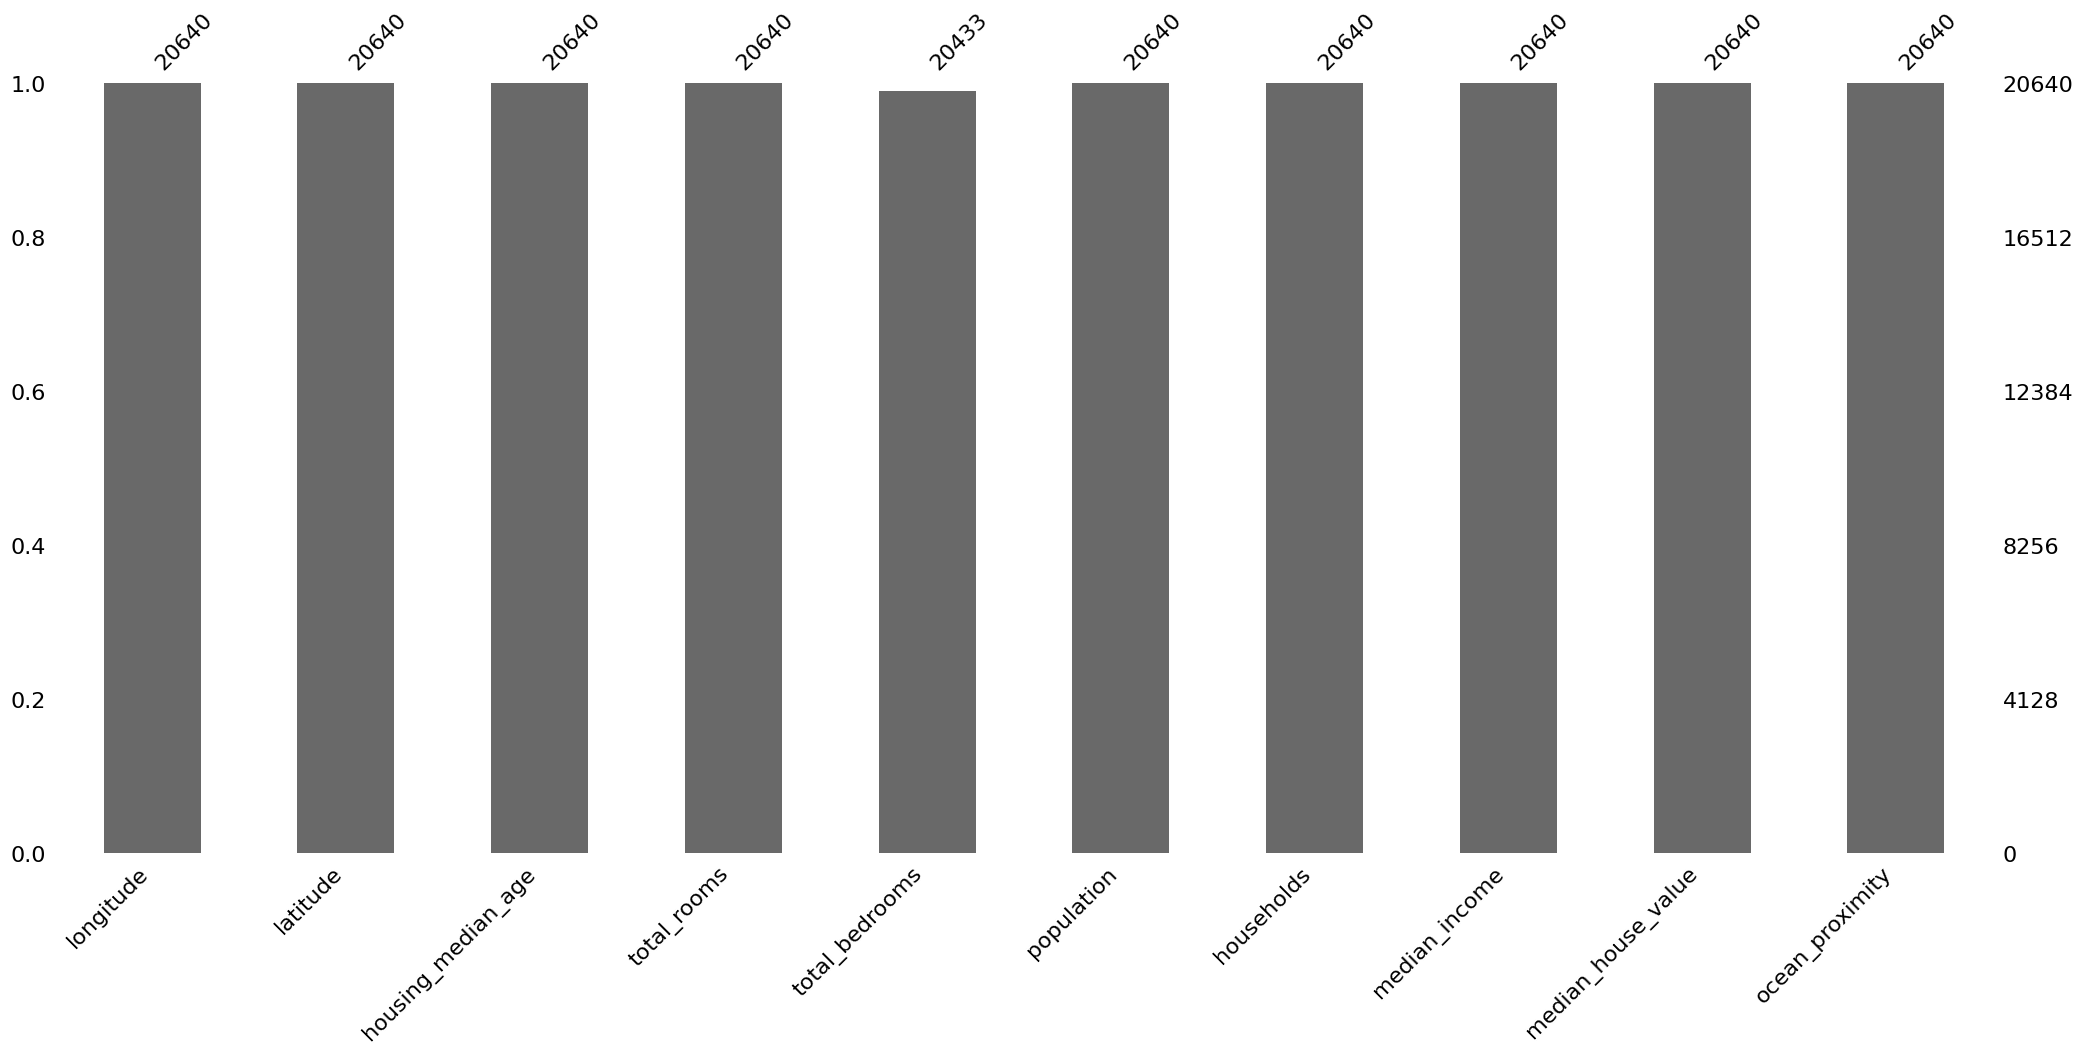

In [8]:
# Missingno bar chart
msno.bar(data)

<Axes: >

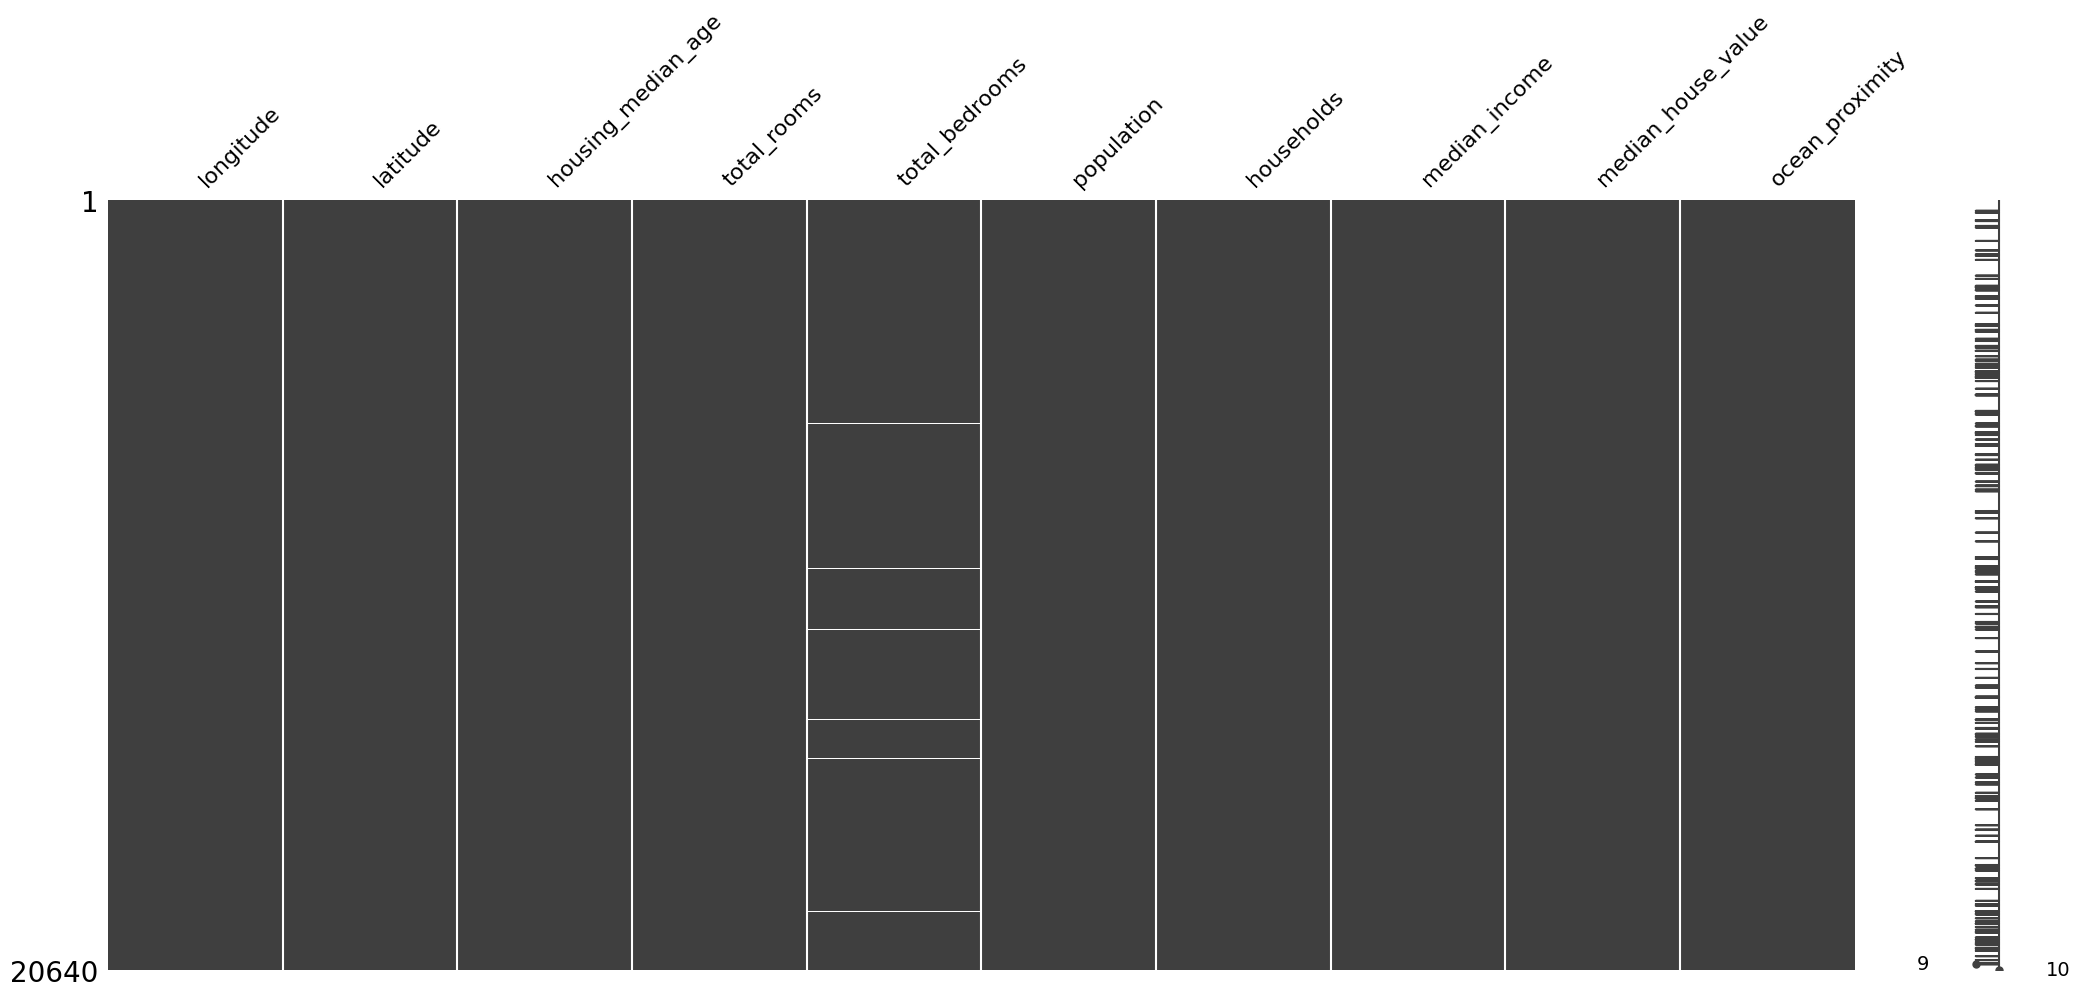

In [9]:
# Missingno matrix
msno.matrix(data)

Όπως θα διαπιστώσετε η μεταβλητή “total_bedrooms” περιέχει ελλιπείς τιμές. Μπορείτε να κάνετε
imputation στα missing data χρησιμοποιώντας την παρακάτω συνάρτηση:
df_name['total_bedrooms']=df_name['total_bedrooms'].replace(np.nan,
df_name['total_bedrooms'].median())

In [10]:
# Replcace missing data with the median value()
data['total_bedrooms']=data['total_bedrooms'].replace(np.nan,data['total_bedrooms'].median())

Η μεταβλητή “ocean_proximity” είναι κατηγορική μεταβλητή. Χρησιμοποιώντας ‘one-hot encoding’
δημιουργήστε μία μεταβλητή για κάθε τιμής της κατηγορικής μεταβλητής (υπάρχει σχετικό παράδειγμα
στα notebooks του μαθήματος) και έπειτα αφαιρέστε τη στήλη “ocean_proximity” εφαρμόζοντας τη
μέθοδο .drop() .

In [11]:
# See the unique values for 'ocean proximity'
print(data['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [12]:
# Create a copy of our data for the rest data manipulation
df = data.copy()

In [13]:
# One-hot encoding technique
df['NEAR BAY'] = (df['ocean_proximity'] == 'NEAR BAY').astype(int)
df['<1H OCEAN'] = (df['ocean_proximity'] == '<1H OCEAN').astype(int)
df['INLAND'] = (df['ocean_proximity'] == 'INLAND').astype(int)
df['NEAR OCEAN'] = (df['ocean_proximity'] == 'NEAR OCEAN').astype(int)
df['ISLAND'] = (df['ocean_proximity'] == 'ISLAND').astype(int)
df.drop('ocean_proximity', axis=1, inplace=True)

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,0,0,0,0


Υπολογίστε την ετεροσυσχέτιση μεταξύ χαρακτηριστικών χρησιμοποιώντας τη συνάρτηση corr()
του pandas και οπτικοποιήστε το αποτέλεσμα (για παράδειγμα χρησιμοποιώντας τη συνάρτηση heatmap()
της seaborn).

In [15]:
C = df.corr()

<Axes: >

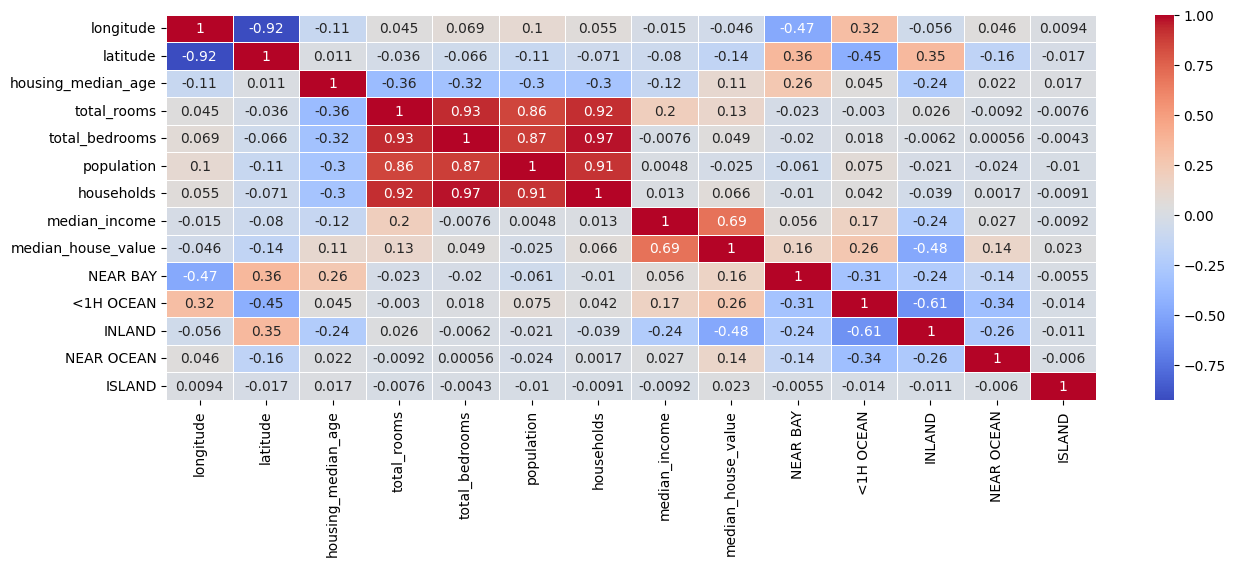

In [16]:
# Create hetamap with seaborn
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(C, annot=True, cmap='coolwarm', linewidths=0.5)

Χωρίστε το σύνολο δεδομένων σε 2 χωριστά dataframes, ένα για τις ανεξάρτητες μεταβλητές (X) και
ένα για την εξαρτημένη μεταβλητή (“median_house_value”). Αφού χωρίσετε τα dataframes, βεβαιωθείτε ότι το δεδομένα X δεν περιέχουν τη στήλη “median_house_value”. Αν την περιέχουν, αφαιρέστε
τη χρησιμοποιώντας για άλλη μια φορά την μέθοδο .drop() .

In [17]:
# Create X dataframe
X = df.drop('median_house_value', axis=1)
# Create y dataframe
y = df['median_house_value']
# Print information
print("Data table shape is",df.shape)
print("Data for X \n", "X shape is", X.shape,"\n", X.head(),"\t")
print("<------------------------------------->")
print("Data for y \n", "y shape is",y.shape,"\n", y.head())
print("<------------------------------------->")

Data table shape is (20640, 14)
Data for X 
 X shape is (20640, 13) 
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  NEAR BAY  <1H OCEAN  INLAND  \
0       322.0       126.0         8.3252         1          0       0   
1      2401.0      1138.0         8.3014         1          0       0   
2       496.0       177.0         7.2574         1          0       0   
3       558.0       219.0         5.6431         1          0       0   
4       565.0       259.0         3.8462         1          0       0   

   NEAR OCEAN  ISLAND  
0           0   

Ερώτηση: Αναφέρετε τις όποιες παρατηρήσεις έχετε για τα δεδομένα με βάση τα αποτελέσματα αυτής
της ανάλυσης.

## 1.2 ∆ημιουργία συνόλου εκπαίδευσης και δοκιμής
Χωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης και δοκιμής χρησιμοποιώντας τη συνάρτηση
train_test_split του scikit-learn . Επιλέξτε 70% για το σύνολο εκπαίδευσης και 30% για το σύνολο
δοκιμής. Χρησιμοποιήστε το όρισμα random_state=42 στην κλήση της συνάρτησης, ώστε να έχουμε
όλοι τα ίδια δείγματα στα σύνολα εκπαίδευσης και δοκιμής. Καλό θα ήταν επίσης να υπάρχει επιβεβαίωση
ότι το αρχικό σύνολο δεδομένων έχει χωριστεί σωστά προτού δοθεί στο μοντέλο για εκπαίδευση και δοκιμή.

# 1.3 Τυποποίηση ∆εδομένων


Το στάδιο της προετοιμασίας των δεδομένων είναι συχνά κρίσιμο για την επίδοση μοντέλων μηχανικής
μάθησης σε δεδομένα πίνακα. Συχνά περιλαμβάνει την αφαίρεση χαρακτηριστικών που δεν προσφέρουν
πληροφορία, το χειρισμό κατηγορικών μεταβλητών, την πλήρωση τιμών που λείπουν (imputation), την κανονικοποίηση ή τυποποίηση των δεδομένων, την αφαίρεση outliers και άλλους μετασχηματισμούς δεδομένων
(πχ χειρισμός κυκλικών μεταβλητών, εισαγωγή πολυωνυμικών όρων), όπως είδαμε και παραπάνω.
Στο συγκεκριμένο βήμα θα εφαρμόσουμε και το κομμάτι της τυποποίησης. ∆ημιουργήστε μεταβλητές
X_train_sc , X_test_sc που είναι τυποποιημένες εκδοχές των αρχικών πινάκων σχεδιασμού για
το σύνολο εκπαίδευσης και δοκιμής, αντίστοιχα. Προσοχή, καθώς θα πρέπει να κρατήσετε και τους πίνακες
των αρχικών δεδομένων. Μπορείτε για την τυποποίηση να χρησιμοποιήσετε τον StandardScaler της
βιβλιοθήκης scikit-learn .

In [18]:
# Create scaler
scaler = StandardScaler()

In [19]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Check for correct split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 13)
(6192, 13)
(14448,)
(6192,)


In [21]:
print(X_train.head())


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7061     -118.02     33.93                35.0       2400.0           398.0   
14689    -117.09     32.79                20.0       2183.0           534.0   
17323    -120.14     34.59                24.0       1601.0           282.0   
10056    -121.00     39.26                14.0        810.0           151.0   
15750    -122.45     37.77                52.0       3188.0           708.0   

       population  households  median_income  NEAR BAY  <1H OCEAN  INLAND  \
7061       1218.0       408.0         4.1312         0          1       0   
14689       999.0       496.0         2.8631         0          0       0   
17323       731.0       285.0         4.2026         0          0       0   
10056       302.0       138.0         3.1094         0          0       1   
15750      1526.0       664.0         3.3068         1          0       0   

       NEAR OCEAN  ISLAND  
7061            0       0  
14689 

In [22]:
# Initial fit and transform the X_tain
X_train_sc = scaler.fit_transform(X_train)
# Transform the X_test
X_test_sc = scaler.transform(X_test)

## 1.4 Ανάπτυξη γραμμικού μοντέλου
Αναπτύξτε ένα γραμμικό μοντέλο χρησιμοποιώντας το sklearn. Αρχικοποιήστε ένα LinearRegression
μοντέλο και παρουσιάστε τις σχετικές μετρικές από το πακέτο metrics του sklearn.

In [23]:
# Initialize linear regression model
lm_no_scld = linear_model.LinearRegression()
lm_scld = linear_model.LinearRegression()
# train model for scaled and not scaled data
no_scld_fit = lm_no_scld.fit(X_train, y_train)
scaled_fit = lm_scld.fit(X_train_sc, y_train)
# Print scorre
print("Model score for not scaled:", lm_no_scld.score(X_train, y_train))
print("Model score for scaled:", lm_scld.score(X_train_sc, y_train))
# Model preedict
y_hat_no_scld = lm_no_scld.predict(X_test)
y_hat_scld = lm_scld.predict(X_test_sc)
# Print metrics
mse_no_scld = metrics.mean_squared_error(y_test, y_hat_no_scld)
mse_scld = metrics.mean_squared_error(y_test, y_hat_scld)
mae_no_scld = metrics.mean_absolute_error(y_test, y_hat_no_scld)
mae_scld = metrics.mean_absolute_error(y_test, y_hat_scld)
print("<------------------------------>")
print("MSE not scaled", mse_no_scld)
print("MSE scaled", mse_scld)
print("<------------------------------>")
print("MAE not scaled", mae_no_scld)
print("MAE scaled", mae_scld)

Model score for not scaled: 0.6470480227253683
Model score for scaled: 0.6470480227253683
<------------------------------>
MSE not scaled 4733529273.092575
MSE scaled 4733529273.092554
<------------------------------>
MAE not scaled 50078.09884156549
MAE scaled 50078.09884156545


In [24]:
from sklearn.model_selection import cross_val_score

# Cross-validation on unscaled data
cv_scores_no_scld = cross_val_score(lm_no_scld, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_scld = cross_val_score(lm_scld, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-validated MSE for not scaled:", -cv_scores_no_scld.mean())
print("Cross-validated MSE for scaled:", -cv_scores_scld.mean())

Cross-validated MSE for not scaled: 4763194358.520627
Cross-validated MSE for scaled: 4763396853.845527


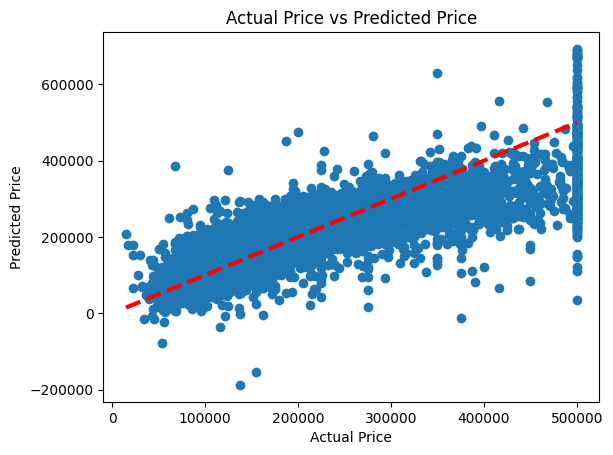

In [25]:
# Create a plot to evaluate the model
plt.scatter(y_test, y_hat_scld)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Plot prediction vs actual, for each feature


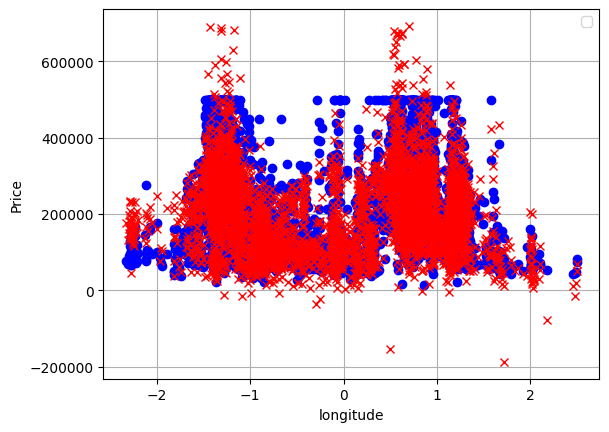

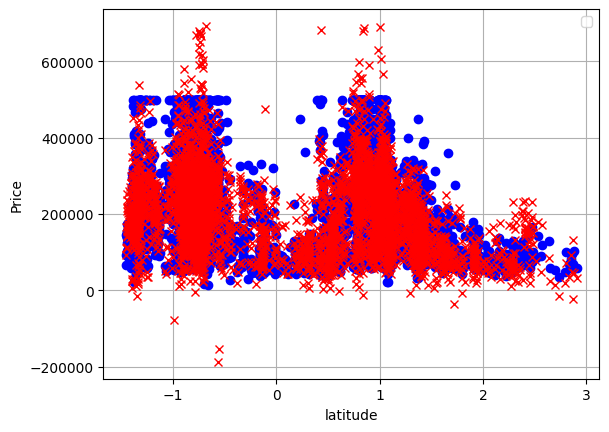

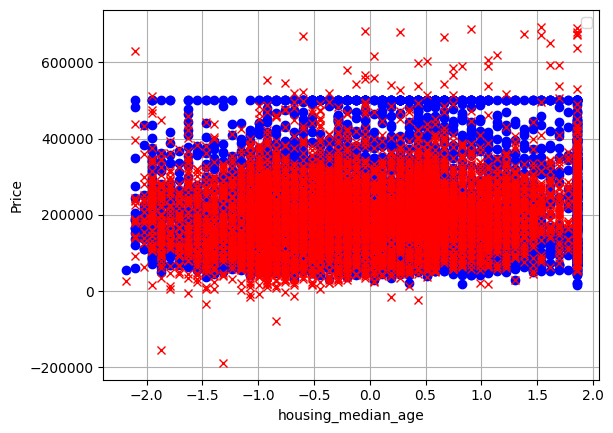

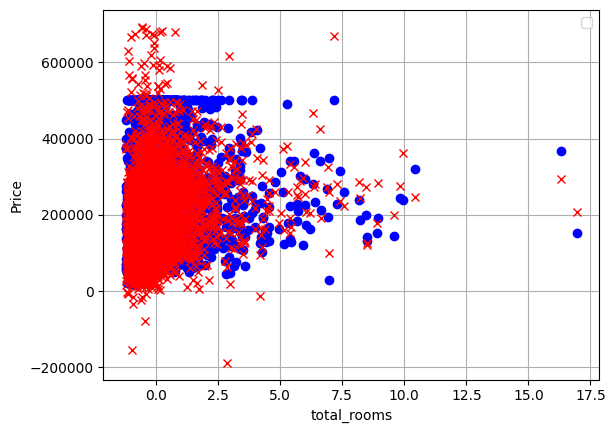

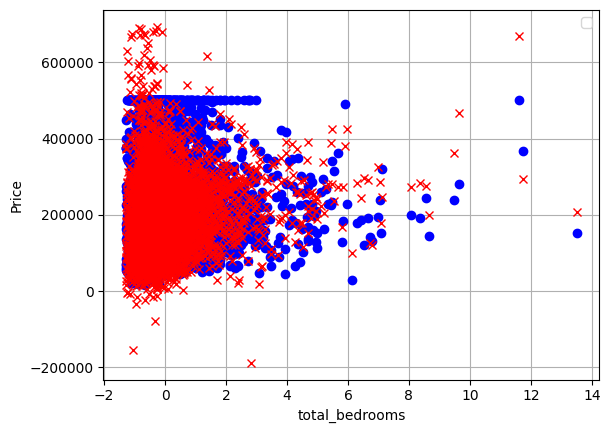

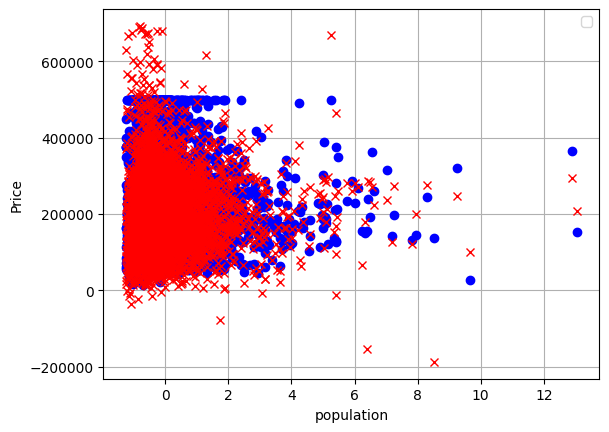

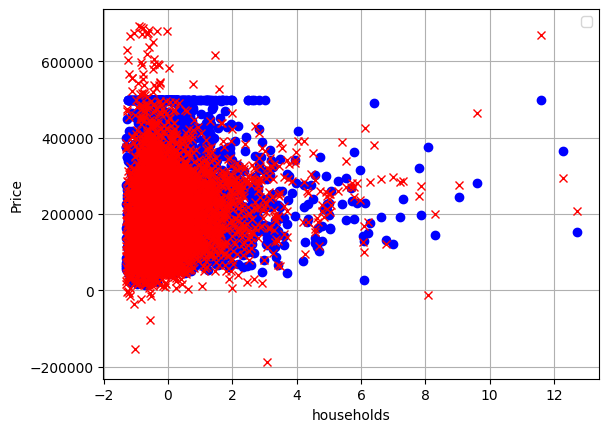

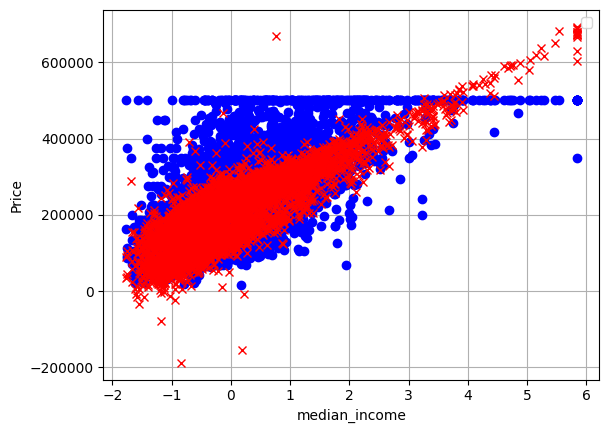

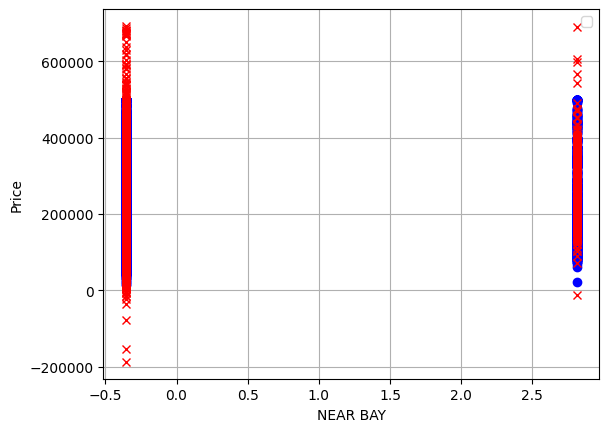

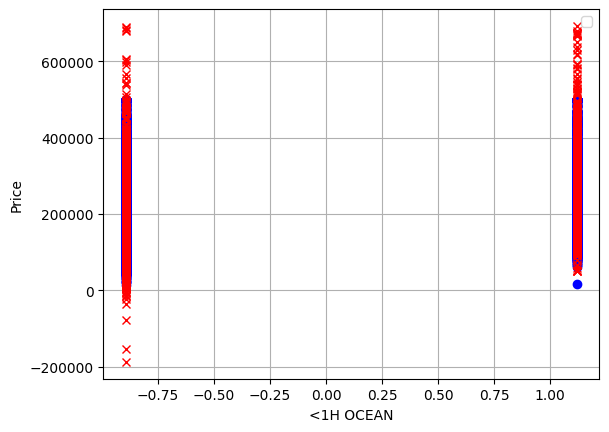

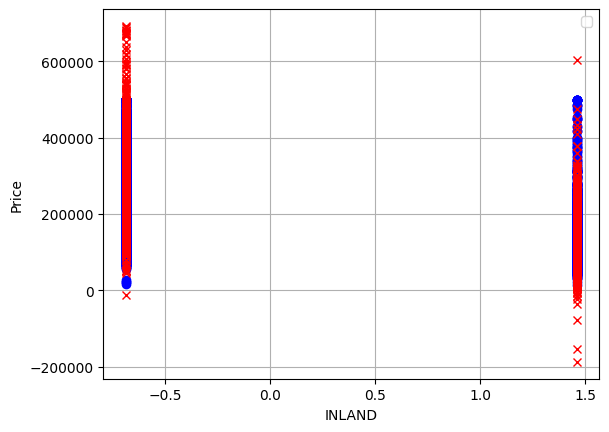

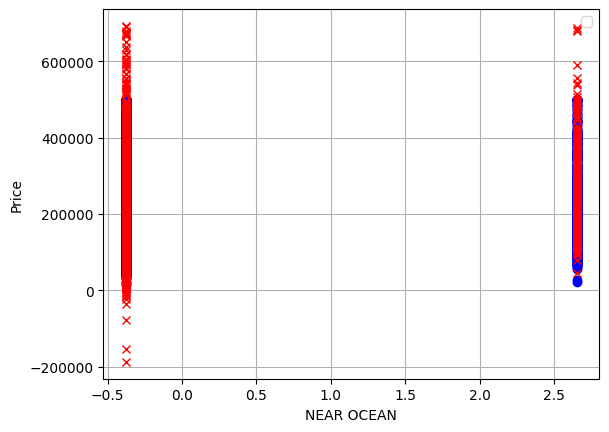

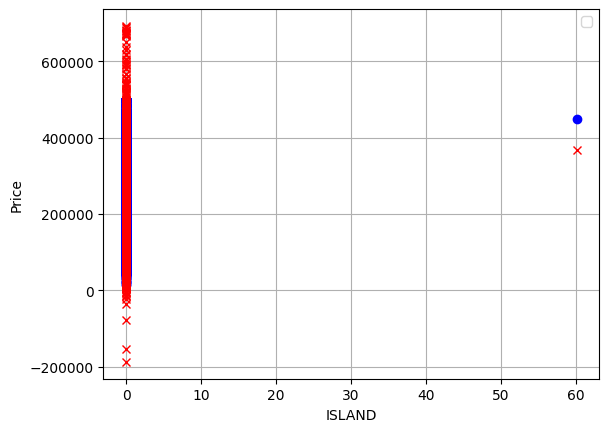

In [26]:
print("Plot prediction vs actual, for each feature")
for i in range(X.shape[1]):
    plt.plot(X_test_sc[:, i], y_test, 'bo')
    plt.plot(X_test_sc[:, i], y_hat_scld, 'rx')
    plt.grid()
    plt.xlabel(X.columns[i])
    plt.ylabel('Price')
    plt.legend()
    plt.show()

Ερώτηση: Τί συμπέρασμα βγάζετε όσον αφορά την τυποποίηση των δεδομένων;

## 1.5 Παλινδρόμηση με Random Forest
Συμβαίνει συχνά σε δεδομένα πίνακα οι μέθοδοι συνόλου (ensemble methods) να αποδίδουν καλύτερα, ιδιαίτερα αυτές που βασίζονται σε δέντρα αποφάσεων, όπως οι μέθοδοι Random Forest και
EXTRA trees και σε περιπτώσεις με σχετικά λίγα δείγματα εκπαίδευσης. Αξιολογήστε την επίδοση ενός
μοντέλου random forest με τις προεπιλεγμένες από το scikit-learn παραμέτρους. Αρκεί να δημιουργήσετε
ένα αντικείμενο sklearn.ensemble.RandomForestRegressor() παρόμοια με τα παραδείγματα που είδαμε στο μάθημα για τα γραμμικά μοντέλα στο scikit-learn. Εκπαιδεύσετε το μοντέλο Random
Forest υλοποιώντας τη συνάρτηση fit() και παρουσιάσετε τις μετρικές αξιολόγησης στο σύνολο δοκιμής.
Ερώτηση: Τι παρατηρείτε σχετικά με την επίδοση του Random Forest σε σύγκριση με τα προηγούμενο
μοντέλο; Πώς εξηγείτε τη διαφορά στην επίδοση;

In [27]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Initialize Random forest
rf_model = RandomForestRegressor()

In [29]:
#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model.fit(X_train_sc,y_train)

RandomForestRegressor()

In [30]:
y_hat_train_rf = rf_model.predict(X_train_sc)
y_hat_test_rf = rf_model.predict(X_test_sc)

In [31]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_hat_train_rf)
test_mse = mean_squared_error(y_test,y_hat_test_rf)
train_mae = mean_absolute_error(y_train, y_hat_train_rf)
test_mae = mean_absolute_error(y_test, y_hat_test_rf)

print(f'Score {rf_model.score(X_test_sc, y_test)}')
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

Score 0.819912426379575
Train MSE: 344749273.42258805
Test MSE: 2363721632.956897
Train MAE: 12026.625101744186
Test MAE: 31649.632416020675
